In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [2]:
x_train = np.array([0.09291784, 0.46809093, 0.93089486, 0.67612654, 0.73441752,
                    0.86847339, 0.49873225, 0.51083168, 0.18343972, 0.99380898,
                    0.27840809, 0.38028817, 0.12055708, 0.56715537, 0.92005746,
                    0.77072270, 0.85278176, 0.05315950, 0.87168699, 0.58858043])

y_train = np.array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

beta_0 = np.array([0.3, -1.0, -0.5])
omega_0 = np.array([-1.0, 1.8, 0.65])
beta_1 = 2.6
omega_1 = np.array([-24.0, -8.0, 50.0])
print("Soient:")
print(f"x_train = {x_train.tolist()}")
print(f"y_train = {y_train.tolist()}")
print(f"β₀ = {beta_0.tolist()}")
print(f"Ω₀ = {omega_0.tolist()}")
print(f"β₁ = {beta_1}")
print(f"Ω₁ = {omega_1.tolist()}")

Soient:
x_train = [0.09291784, 0.46809093, 0.93089486, 0.67612654, 0.73441752, 0.86847339, 0.49873225, 0.51083168, 0.18343972, 0.99380898, 0.27840809, 0.38028817, 0.12055708, 0.56715537, 0.92005746, 0.7707227, 0.85278176, 0.0531595, 0.87168699, 0.58858043]
y_train = [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
β₀ = [0.3, -1.0, -0.5]
Ω₀ = [-1.0, 1.8, 0.65]
β₁ = 2.6
Ω₁ = [-24.0, -8.0, 50.0]


In [3]:
def relu(x):
    """Fonction d'activation ReLU"""
    return np.maximum(0, x)

def sigmoid(x):
    """Fonction d'activation Sigmoid"""
    return 1 / (1 + np.exp(-x))

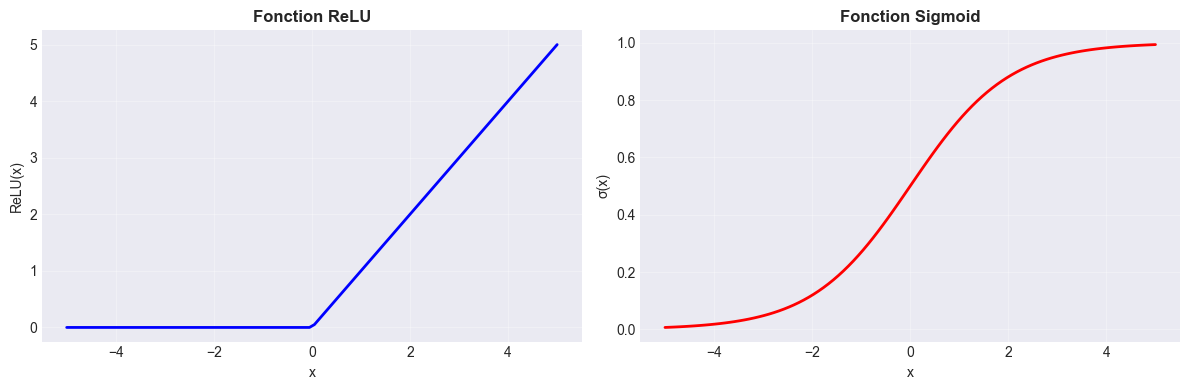

In [4]:
x_test = np.linspace(-5, 5, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x_test, relu(x_test), 'b-', linewidth=2)
ax1.set_title('Fonction ReLU', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('ReLU(x)')
ax1.grid(True, alpha=0.3)

ax2.plot(x_test, sigmoid(x_test), 'r-', linewidth=2)
ax2.set_title('Fonction Sigmoid', fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('σ(x)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
def compute_hidden(x):
    """Calcule la sortie de la couche cachée h(x)"""
    return relu(beta_0 + omega_0 * x)

def compute_output(x, beta1):
    """Calcule la sortie du réseau f(x)"""
    h = compute_hidden(x)
    return beta1 + np.dot(omega_1, h)

def compute_probability(x, beta1):
    """Calcule la probabilité P(y=1|x) = σ(f(x))"""
    return sigmoid(compute_output(x, beta1))

def compute_likelihood(x_data, y_data, beta1):
    """Calcule le Likelihood L(θ)"""
    likelihood = 1.0
    for xi, yi in zip(x_data, y_data):
        prob = compute_probability(xi, beta1)
        likelihood *= (prob ** yi) * ((1 - prob) ** (1 - yi))
    return likelihood

def compute_nll(x_data, y_data, beta1):
    """Calcule le Negative Log-Likelihood (Binary Cross-Entropy)"""
    nll = 0.0
    epsilon = 1e-15
    for xi, yi in zip(x_data, y_data):
        prob = compute_probability(xi, beta1)
        prob = np.clip(prob, epsilon, 1 - epsilon)
        nll -= yi * np.log(prob) + (1 - yi) * np.log(1 - prob)
    return nll

In [22]:
def plot_question1(beta1=2.6):
    """Visualisation de f(x) et Pr(y=1|x)"""
    # Variation de x de 0 à 1 par pas de 0.01
    x_values = np.arange(0, 1.01, 0.01)
    f_values = np.array([compute_output(x, beta1) for x in x_values])
    prob_values = sigmoid(f_values)
    
    # Calcul des métriques
    likelihood = compute_likelihood(x_train, y_train, beta1)
    nll = compute_nll(x_train, y_train, beta1)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Subplot 1: f(x)
    ax1.plot(x_values, f_values, 'b-', linewidth=2.5, label='f(x)')
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.set_xlabel('x', fontsize=12, fontweight='bold')
    ax1.set_ylabel('f(x)', fontsize=12, fontweight='bold')
    ax1.set_title(f'Sortie du réseau f(x) avant activation (β₁ = {beta1:.2f})', 
                  fontsize=13, fontweight='bold')
    ax1.legend(fontsize=11)
    
    # Subplot 2: Pr(y=1|x) avec données
    ax2.plot(x_values, prob_values, 'b-', linewidth=2.5, label='Pr(y=1|x) = σ(f(x))')
    ax2.scatter(x_train, y_train, c='black', s=80, zorder=5, 
               label='Données d\'apprentissage (disques noirs)')
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.set_xlabel('x', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Pr(y=1|x)', fontsize=12, fontweight='bold')
    title = f'Sortie sigmoïd Pr(y=1|x) et données d\'apprentissage\n'
    title += f'L(θ) = {likelihood:.4e} | NLL = {nll:.4f}'
    ax2.set_title(title, fontsize=13, fontweight='bold')
    ax2.legend(fontsize=10, loc='best')
    ax2.set_ylim(-0.05, 1.05)
    ax2.set_xlim(-0.02, 1.02)
    
    plt.tight_layout()
    plt.show()

In [24]:
interact(plot_question1, beta1=FloatSlider(min=-5, max=10, step=0.01, value=2.6, 
                                           description='β₁:', continuous_update=False))

interactive(children=(FloatSlider(value=2.6, continuous_update=False, description='β₁:', max=10.0, min=-5.0, s…

<function __main__.plot_question1(beta1=2.6)>

In [26]:
def show_likelihood(beta1=2.6):
    """Affiche le Likelihood pour une valeur de β₁"""
    likelihood = compute_likelihood(x_train, y_train, beta1)
    print(f"Pour β₁ = {beta1:.2f}:")
    print(f"  Likelihood L(θ) = {likelihood:.10e}")
    return likelihood


In [27]:
interact(show_likelihood, beta1=FloatSlider(min=-5, max=10, step=0.1, value=2.6, 
                                            description='β₁:', continuous_update=False))

interactive(children=(FloatSlider(value=2.6, continuous_update=False, description='β₁:', max=10.0, min=-5.0), …

<function __main__.show_likelihood(beta1=2.6)>

In [28]:
def show_nll(beta1=2.6):
    """Affiche le NLL pour une valeur de β₁"""
    nll = compute_nll(x_train, y_train, beta1)
    likelihood = compute_likelihood(x_train, y_train, beta1)
    
    print(f"Pour β₁ = {beta1:.2f}:")
    print(f"  Negative Log-Likelihood (NLL) = {nll:.8f}")
    print(f"  Vérification: -log(L(θ)) = {-np.log(likelihood):.8f}")
    return nll


interact(show_nll, beta1=FloatSlider(min=-5, max=10, step=0.1, value=2.6, 
                                     description='β₁:', continuous_update=False))


interactive(children=(FloatSlider(value=2.6, continuous_update=False, description='β₁:', max=10.0, min=-5.0), …

<function __main__.show_nll(beta1=2.6)>

In [29]:
def show_predictions(beta1=2.6):
    """Affiche les prédictions pour chaque point"""
    print(f"Prédictions pour β₁ = {beta1:.2f}:")
    print("="*60)
    print(f"{'i':>3} | {'x[i]':>10} | {'y[i]':>5} | {'P(y=1|x[i])':>12}")
    print("-"*60)
    
    for i, (xi, yi) in enumerate(zip(x_train, y_train)):
        prob = compute_probability(xi, beta1)
        print(f"{i:3d} | {xi:10.6f} | {yi:5d} | {prob:12.8f}")

# Interactive
interact(show_predictions, beta1=FloatSlider(min=-5, max=10, step=0.5, value=2.6, 
                                             description='β₁:', continuous_update=False))

interactive(children=(FloatSlider(value=2.6, continuous_update=False, description='β₁:', max=10.0, min=-5.0, s…

<function __main__.show_predictions(beta1=2.6)>

In [30]:
def optimize_beta1(x_data, y_data, beta1_range=(-5, 10), num_points=300):
    """Trouve la valeur optimale de β₁"""
    beta1_values = np.linspace(beta1_range[0], beta1_range[1], num_points)
    likelihood_values = []
    nll_values = []
    
    for b1 in beta1_values:
        likelihood_values.append(compute_likelihood(x_data, y_data, b1))
        nll_values.append(compute_nll(x_data, y_data, b1))
    
    likelihood_values = np.array(likelihood_values)
    nll_values = np.array(nll_values)
    
    idx_max_likelihood = np.argmax(likelihood_values)
    idx_min_nll = np.argmin(nll_values)
    
    return {
        'beta1_values': beta1_values,
        'likelihood_values': likelihood_values,
        'nll_values': nll_values,
        'optimal_beta1_likelihood': beta1_values[idx_max_likelihood],
        'max_likelihood': likelihood_values[idx_max_likelihood],
        'optimal_beta1_nll': beta1_values[idx_min_nll],
        'min_nll': nll_values[idx_min_nll]
    }

# Optimisation
print("Calcul de l'optimisation en cours...")
results = optimize_beta1(x_train, y_train)
print("Terminé!")

Calcul de l'optimisation en cours...
Terminé!


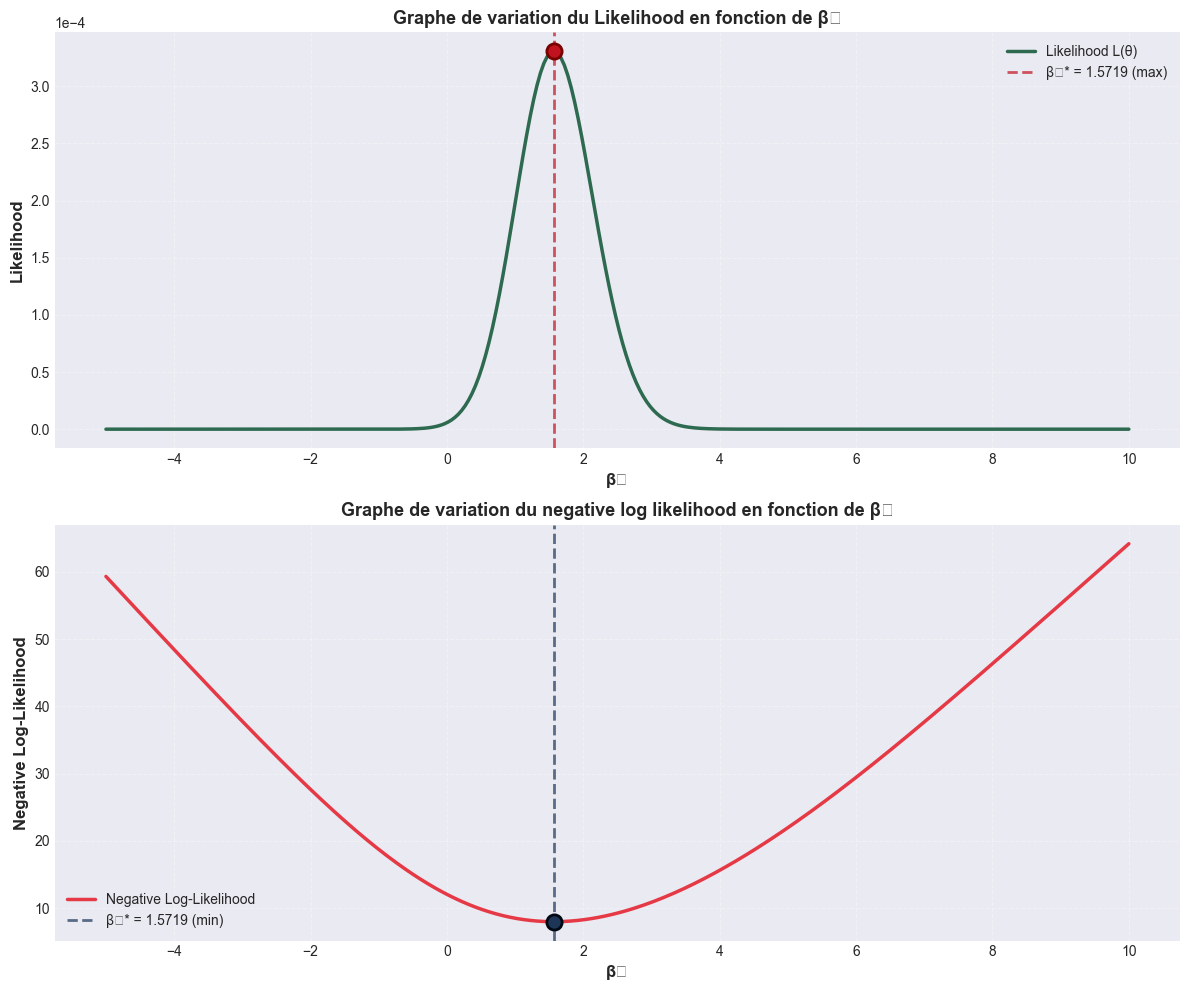

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

beta1_values = results['beta1_values']
likelihood_values = results['likelihood_values']
nll_values = results['nll_values']
opt_beta1_likelihood = results['optimal_beta1_likelihood']
max_likelihood = results['max_likelihood']
opt_beta1_nll = results['optimal_beta1_nll']
min_nll = results['min_nll']

# Subplot 1: Likelihood
ax1.plot(beta1_values, likelihood_values, color='#2D6A4F', linewidth=2.5, 
         label='Likelihood L(θ)')
ax1.axvline(opt_beta1_likelihood, color='#C1121F', linestyle='--', 
            linewidth=2, alpha=0.7, label=f'β₁* = {opt_beta1_likelihood:.4f} (max)')
ax1.scatter([opt_beta1_likelihood], [max_likelihood], color='#C1121F', 
            s=120, zorder=5, marker='o', edgecolors='#780000', linewidth=2)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlabel('β₁', fontsize=12, fontweight='bold')
ax1.set_ylabel('Likelihood', fontsize=12, fontweight='bold')
ax1.set_title('Graphe de variation du Likelihood en fonction de β₁', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Subplot 2: NLL
ax2.plot(beta1_values, nll_values, color='#E63946', linewidth=2.5, 
         label='Negative Log-Likelihood')
ax2.axvline(opt_beta1_nll, color='#1D3557', linestyle='--', 
            linewidth=2, alpha=0.7, label=f'β₁* = {opt_beta1_nll:.4f} (min)')
ax2.scatter([opt_beta1_nll], [min_nll], color='#1D3557', 
            s=120, zorder=5, marker='o', edgecolors='#000814', linewidth=2)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlabel('β₁', fontsize=12, fontweight='bold')
ax2.set_ylabel('Negative Log-Likelihood', fontsize=12, fontweight='bold')
ax2.set_title('Graphe de variation du negative log likelihood en fonction de β₁', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10, loc='best')

plt.tight_layout()
plt.show()

In [35]:
print("QUESTION 4: RÉSULTATS DE L'OPTIMISATION")

print("\nValeur de β₁ qui donne le max du Likelihood:")
print(f"  β₁* = {opt_beta1_likelihood:.8f}")
print(f"  L(θ*) = {max_likelihood:.10e}")

print("\nValeur de β₁ qui donne le min du negative log likelihood:")
print(f"  β₁* = {opt_beta1_nll:.8f}")
print(f"  NLL(θ*) = {min_nll:.8f}")

diff = abs(opt_beta1_likelihood - opt_beta1_nll)
print(f"\nDifférence entre les deux valeurs optimales: {diff:.12f}")

print("Conclusion:")
print(f"✓ La vraisemblance est maximale pour β₁* = {opt_beta1_likelihood:.6f}")
print(f"✓ NLL est minimale exactement au même point β₁* = {opt_beta1_nll:.6f}")
print("\nCeci montre empiriquement que:")
print("  max L(θ) ⟺ min NLL(θ)")
print("\nLes autres paramètres étant fixés (β₀, Ω₀, Ω₁), seul β₁ influence")
print("l'optimisation, et les deux approches convergent vers la même valeur.")


QUESTION 4: RÉSULTATS DE L'OPTIMISATION

Valeur de β₁ qui donne le max du Likelihood:
  β₁* = 1.57190635
  L(θ*) = 3.3055452388e-04

Valeur de β₁ qui donne le min du negative log likelihood:
  β₁* = 1.57190635
  NLL(θ*) = 8.01473894

Différence entre les deux valeurs optimales: 0.000000000000
Conclusion:
✓ La vraisemblance est maximale pour β₁* = 1.571906
✓ NLL est minimale exactement au même point β₁* = 1.571906

Ceci montre empiriquement que:
  max L(θ) ⟺ min NLL(θ)

Les autres paramètres étant fixés (β₀, Ω₀, Ω₁), seul β₁ influence
l'optimisation, et les deux approches convergent vers la même valeur.



Visualisation avec la valeur optimale β₁* = 1.5719


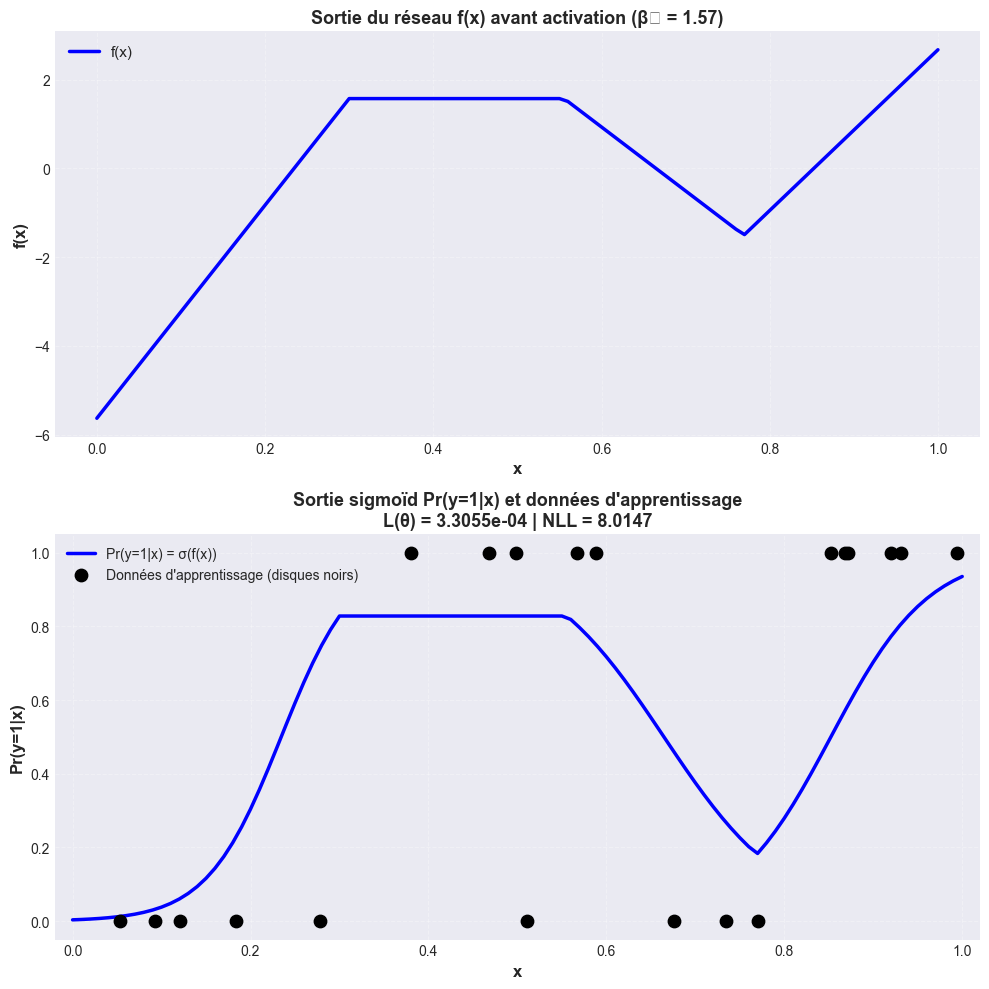

In [33]:
print(f"\nVisualisation avec la valeur optimale β₁* = {opt_beta1_likelihood:.4f}")
plot_question1(opt_beta1_likelihood)